In [1]:
cd C:\Users\harik\OneDrive\Documents\Projects\BTP\1907French-etal-SDLE-EL-ImageDataSet-forML

C:\Users\harik\OneDrive\Documents\Projects\BTP\1907French-etal-SDLE-EL-ImageDataSet-forML


In [2]:
#from elpv_reader import load_dataset
import tensorflow as tf
import tensorflow.keras
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time
import pandas as pd
import random
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17000103631286874605
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4183621632
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2950499369625551441
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [4]:
filenames = os.listdir("train/c0")
print(filenames)
categories_train = []
filenamefin_train = []
for filename in filenames:
      categories_train.append("0")
      filenamefin_train.append(filename)
filenames = os.listdir("train/c1")


for filename in filenames:
    categories_train.append("1")
    filenamefin_train.append(filename)

filenames = os.listdir("train/c2")
for filename in filenames:
    categories_train.append("2")
    filenamefin_train.append(filename)

    
filenames = os.listdir("train/c3")
for filename in filenames:
    categories_train.append("3")
    filenamefin_train.append(filename)

filenames = os.listdir("train/c4")
for filename in filenames:
    categories_train.append("4")
    filenamefin_train.append(filename)
  
df = pd.DataFrame({
    'filename': filenamefin_train,
    'category': categories_train
})
df

['A1-DH3000-3000h-PT-cell1.jpg', 'A1-DH3000-3000h-PT-cell11.jpg', 'A1-DH3000-3000h-PT-cell12.jpg', 'A1-DH3000-3000h-PT-cell13.jpg', 'A1-DH3000-3000h-PT-cell15.jpg', 'A1-DH3000-3000h-PT-cell17.jpg', 'A1-DH3000-3000h-PT-cell19.jpg', 'A1-DH3000-3000h-PT-cell2.jpg', 'A1-DH3000-3000h-PT-cell21.jpg', 'A1-DH3000-3000h-PT-cell22.jpg', 'A1-DH3000-3000h-PT-cell24.jpg', 'A1-DH3000-3000h-PT-cell25.jpg', 'A1-DH3000-3000h-PT-cell26.jpg', 'A1-DH3000-3000h-PT-cell27.jpg', 'A1-DH3000-3000h-PT-cell28.jpg', 'A1-DH3000-3000h-PT-cell29.jpg', 'A1-DH3000-3000h-PT-cell30.jpg', 'A1-DH3000-3000h-PT-cell31.jpg', 'A1-DH3000-3000h-PT-cell32.jpg', 'A1-DH3000-3000h-PT-cell33.jpg', 'A1-DH3000-3000h-PT-cell34.jpg', 'A1-DH3000-3000h-PT-cell37.jpg', 'A1-DH3000-3000h-PT-cell38.jpg', 'A1-DH3000-3000h-PT-cell40.jpg', 'A1-DH3000-3000h-PT-cell41.jpg', 'A1-DH3000-3000h-PT-cell42.jpg', 'A1-DH3000-3000h-PT-cell43.jpg', 'A1-DH3000-3000h-PT-cell44.jpg', 'A1-DH3000-3000h-PT-cell45.jpg', 'A1-DH3000-3000h-PT-cell46.jpg', 'A1-DH3000-

,filename,category
0,A1-DH3000-3000h-PT-cell1.jpg,0
1,A1-DH3000-3000h-PT-cell11.jpg,0
2,A1-DH3000-3000h-PT-cell12.jpg,0
3,A1-DH3000-3000h-PT-cell13.jpg,0
4,A1-DH3000-3000h-PT-cell15.jpg,0
...,...,...
2617,cell2436.png,4
2618,cell2441.png,4
2619,cell2442.png,4
2620,cell2443.png,4


In [5]:
filenames = os.listdir("test/c0")
print(filenames)
categories_test = []
filenamefin_test = []
for filename in filenames:
      categories_test.append("0")
      filenamefin_test.append(filename)
filenames = os.listdir("test/c1")


for filename in filenames:
    categories_test.append("1")
    filenamefin_test.append(filename)

filenames = os.listdir("test/c2")
for filename in filenames:
    categories_test.append("2")
    filenamefin_test.append(filename)

filenames = os.listdir("test/c3")
for filename in filenames:
    categories_test.append("3")
    filenamefin_test.append(filename)

filenames = os.listdir("test/c4")
for filename in filenames:
    categories_test.append("4")
    filenamefin_test.append(filename)

test_df = pd.DataFrame({
    'filename': filenamefin_test,
    'category': categories_test
})
test_df

['A1-DH3000-3000h-PT-cell10.jpg', 'A1-DH3000-3000h-PT-cell14.jpg', 'A1-DH3000-3000h-PT-cell16.jpg', 'A1-DH3000-3000h-PT-cell18.jpg', 'A1-DH3000-3000h-PT-cell20.jpg', 'A1-DH3000-3000h-PT-cell3.jpg', 'A1-DH3000-3000h-PT-cell36.jpg', 'A1-DH3000-3000h-PT-cell39.jpg', 'A1-DH3000-3000h-PT-cell4.jpg', 'A1-DH3000-3000h-PT-cell47.jpg', 'A1-DH3000-3000h-PT-cell6.jpg', 'A1-DH3000-3000h-PT-cell60.jpg', 'A1-DH3000-3000h-PT-cell7.jpg', 'A10-DH3000-3000h-PT-cell19.jpg', 'A10-DH3000-3000h-PT-cell21.jpg', 'A10-DH3000-3000h-PT-cell28.jpg', 'A10-DH3000-3000h-PT-cell29.jpg', 'A10-DH3000-3000h-PT-cell34.jpg', 'A10-DH3000-3000h-PT-cell38.jpg', 'A10-DH3000-3000h-PT-cell46.jpg', 'A10-DH3000-3000h-PT-cell48.jpg', 'A10-DH3000-3000h-PT-cell5.jpg', 'A10-DH3000-3000h-PT-cell50.jpg', 'A10-DH3000-3000h-PT-cell57.jpg', 'A10-DH3000-3000h-PT-cell6.jpg', 'A11-DH3000-2500h-PT-cell37.jpg', 'A11-DH3000-2500h-PT-cell39.jpg', 'A11-DH3000-3000h-PT-cell1.jpg', 'A11-DH3000-3000h-PT-cell12.jpg', 'A11-DH3000-3000h-PT-cell14.jpg',

,filename,category
0,A1-DH3000-3000h-PT-cell10.jpg,0
1,A1-DH3000-3000h-PT-cell14.jpg,0
2,A1-DH3000-3000h-PT-cell16.jpg,0
3,A1-DH3000-3000h-PT-cell18.jpg,0
4,A1-DH3000-3000h-PT-cell20.jpg,0
...,...,...
376,cell2428.png,4
377,cell2429.png,4
378,cell2430.png,4
379,cell2432.png,4


In [6]:
train_df, validate_df = train_test_split(df, test_size=0.1, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

['4']


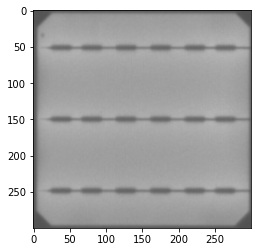

In [7]:
sample = random.choice(filenamefin_train)
orders = df.loc[df.filename == sample, 'category'].unique()
print(orders)
if orders == '0':
  image = load_img("train/c0/" + sample)
elif orders == '1':
  image = load_img("train/c1/" + sample)
elif orders == '2':
  image = load_img("train/c2/" + sample)
elif orders == '3':
  image = load_img("train/c3/" + sample)
elif orders == '4':
  image = load_img("train/c4/" + sample)
plt.imshow(image)

In [8]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=16
IMAGE_SIZE=(200,200)

In [38]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
train_generator = train_datagen.flow_from_dataframe(
    df, 
    "train_set", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 2620 validated image filenames belonging to 5 classes.


In [39]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "train_set", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 263 validated image filenames belonging to 5 classes.


In [40]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "test_set", 
    x_col='filename',
    y_col='category',
    class_mode='categorical',
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle = False
)

Found 381 validated image filenames belonging to 5 classes.


In [41]:
model_vgg19= tf.keras.applications.VGG19(weights="imagenet", include_top=False, input_shape = (200,200,3))
print(model_vgg19.summary())

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [42]:
i = 0
for layer in model_vgg19.layers[:]:
    if(i%2 == 0):
        layer.trainable = False
    i = i+1
for layer in model_vgg19.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x00000221C54F4070> False
<keras.layers.convolutional.Conv2D object at 0x00000221C54F4E50> True
<keras.layers.convolutional.Conv2D object at 0x000002218305C820> False
<keras.layers.pooling.MaxPooling2D object at 0x00000221C5686D60> True
<keras.layers.convolutional.Conv2D object at 0x00000221C54DFC70> False
<keras.layers.convolutional.Conv2D object at 0x00000221C5703D00> True
<keras.layers.pooling.MaxPooling2D object at 0x00000221C5703A60> False
<keras.layers.convolutional.Conv2D object at 0x00000221C56DBA00> True
<keras.layers.convolutional.Conv2D object at 0x00000221C56AD1C0> False
<keras.layers.convolutional.Conv2D object at 0x00000221C56FF340> True
<keras.layers.convolutional.Conv2D object at 0x00000221C56F9520> False
<keras.layers.pooling.MaxPooling2D object at 0x00000221C56EFD30> True
<keras.layers.convolutional.Conv2D object at 0x00000221C56F2280> False
<keras.layers.convolutional.Conv2D object at 0x00000221C56EF3D0> True
<keras.laye

In [43]:
# Create the model
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
new_model = Sequential()
# Add the vgg convolutional base model

new_model.add(model_vgg19)

new_model.add(Flatten())
new_model.add(Dense(64, activation='relu'))
new_model.add(tensorflow.keras.layers.Dropout(0.5))
new_model.add(Dense(5, activation='softmax'))
# Show a summary of the new_model. Check the number of trainable parameters

new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 6, 6, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                1179712   
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 325       
Total params: 21,204,421
Trainable params: 11,653,893
Non-trainable params: 9,550,528
_________________________________________________________________


In [44]:
new_model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 6, 6, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                1179712   
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 325       
Total params: 21,204,421
Trainable params: 11,653,893
Non-trainable params: 9,550,528
_________________________________________________________________


In [46]:
history = new_model.fit(train_generator, epochs=50)#,validation_data=validation_generator)

Epoch 1/50
164/164 [==============================] - 29s 176ms/step - loss: 0.5263 - accuracy: 0.8302
Epoch 2/50
164/164 [==============================] - 29s 176ms/step - loss: 0.3575 - accuracy: 0.8866
Epoch 3/50
164/164 [==============================] - 29s 176ms/step - loss: 0.3122 - accuracy: 0.9069s - loss: 0.3113 - accuracy:  - ETA: 2s - loss: 0.317 - ETA: 1s - loss: 0.3097 - ac
Epoch 4/50
164/164 [==============================] - 29s 177ms/step - loss: 0.2356 - accuracy: 0.9332s - loss: 0
Epoch 5/50
164/164 [==============================] - 29s 177ms/step - loss: 0.2311 - accuracy: 0.9321s - - ETA: 0s - loss: 0.2311 - accuracy: 0.93
Epoch 6/50
164/164 [==============================] - 29s 177ms/step - loss: 0.2162 - accuracy: 0.9408s - loss: 0.2111 - accu - ETA: 0s - loss: 0.2153 - accuracy: 0.
Epoch 7/50
164/164 [==============================] - 29s 178ms/step - loss: 0.2010 - accuracy: 0.9370
Epoch 8/50
164/164 [==============================] - 29s 177ms/step - loss: 

50


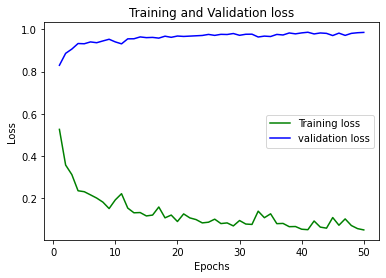

In [48]:
loss_train = history.history['loss']
loss_val = history.history['accuracy']
epochs = range(1,51)
print(len(epochs))
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [49]:
 new_model.evaluate(test_generator)

24/24 [==============================] - 2s 72ms/step - loss: 0.0207 - accuracy: 0.9948


[0.020660242065787315, 0.9947506785392761]

In [50]:
predictions = new_model.predict(test_generator)

In [51]:
def process_images(n):
  sample = test_df.filename[n]
  #print(sample)
  orders = test_df.category[n]
  #print(orders)
  image = load_img("test_set/" + sample)
  #plt.imshow(image)
  #print(predictions[n])
  return ord(orders), predictions[n].argmax(), image

In [52]:
s = predictions.shape
pr = [0, 0, 0, 0, 0]
tr = [0, 0, 0, 0, 0]
lis = []
for i in range(0, s[0]):
  tr1, pr1, img = process_images(i)
  tr1 = tr1 - 48
  if(tr1 != pr1):
    lis.append(img)
    #print(pr1, tr1)
  pr[pr1] = pr[pr1] + 1
  tr[tr1] = tr[tr1] + 1
print(pr)
print(tr)

[41, 25, 194, 32, 89]
[41, 24, 195, 33, 88]


In [23]:
s = predictions.shape
pr = [0, 0, 0, 0, 0]
tr = [0, 0, 0, 0, 0]
lis = []
for i in range(0, s[0]):
  tr1, pr1, img = process_images(i)
  tr1 = tr1 - 48
  if(tr1 != pr1):
    lis.append(img)
    #print(pr1, tr1)
  pr[pr1] = pr[pr1] + 1
  tr[tr1] = tr[tr1] + 1
print(pr)
print(tr)

[41, 23, 196, 32, 89]
[41, 24, 195, 33, 88]


In [54]:
os.chdir(r'C:\Users\harik\OneDrive\Documents\Python\BTP')
model_json = new_model.to_json()
with open("model_vgg19.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
new_model.save_weights("model_vgg19.h5")
print("Saved model to disk")

Saved model to disk
